# 6 Visualizations

Used plotting library: **Seaborn**    
http://seaborn.pydata.org    
    
    
Used plotstyle: **Factorplot via FacetGrid**   
http://seaborn.pydata.org/generated/seaborn.factorplot.html?highlight=factorplot#seaborn.factorplot


## Library Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce

## 6.1 Preprocessing

Inserting of a new virtual cluster which represents the whole data.

In [2]:
df = pd.read_csv("../03_clustering/data new/clustered.csv", encoding="utf-8", sep=",", index_col="CustID")

df_copy = df.copy()
df_copy["Cluster"] = "All"

df_enriched= pd.concat([df, df_copy])

In [3]:
df_enriched.head()

,Length (First/Last),Recency (3),Frequency (Monthly),Monetary (Revenue),Monetary (Revenue/Purchase),Periodicity (Std),Cluster
CustID,,,,,,,
1601060367199,442,8.00,1.81,1514.71,52.23,12.18,0
1604011635399,416,86.33,0.50,360.17,45.02,35.96,2
1604121617999,389,23.33,0.80,684.38,57.03,37.40,2
1605041917999,411,115.00,0.50,307.72,38.47,49.21,4
1610010812799,319,150.67,0.50,550.89,68.86,57.35,4


In [4]:
#Saving of the enriched file
df_enriched.to_csv("data new/enriched.csv", encoding="utf-8", sep=",")

Transform the dataframe to longform.   
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html

In [5]:
df_longform = pd.melt(df_enriched, id_vars="Cluster")
df_longform["Cluster"] = df_longform["Cluster"].astype("str")

In [6]:
df_longform.head()

,Cluster,variable,value
0,0,Length (First/Last),442.0
1,2,Length (First/Last),416.0
2,2,Length (First/Last),389.0
3,4,Length (First/Last),411.0
4,4,Length (First/Last),319.0


## 7.2 Countplot
http://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=count#seaborn.countplot

In [7]:
def show_count (dataframe, var, title, labeliv, rot, output_path=None):
    g = sns.factorplot(x=var, data=dataframe, kind="count",
                      palette="Blues", size=4, aspect=1.6, order=["All",0,1,2,3])

    plt.title(title+"\n", size=20, x=0.45)
    g.set_xticklabels(step=labeliv)
    g.set_xticklabels(rotation=rot)
    plt.ylabel("Number of customers")
    
    def set_style():
        rc = {"axes.labelsize": 13, "xtick.labelsize": 11, "ytick.labelsize": 11}
        sns.set(font="Arial",rc=rc)
        sns.set_style("ticks")
    
    set_style()
    plt.show()
    
    if output_path is not None:
        g.savefig(output_path,dpi=350)

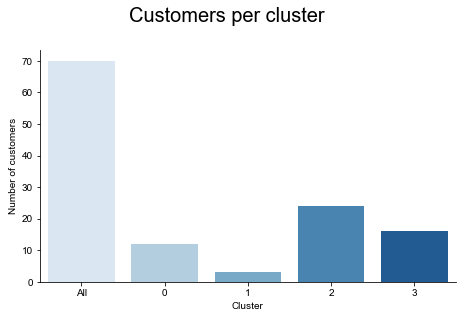

In [8]:
show_count(df_enriched,"Cluster","Customers per cluster",1,0,"visualizations/count_customers per cluster")

## 7.3 Violinplots

http://seaborn.pydata.org/generated/seaborn.violinplot.html

In [9]:
def plot_violin(input_df, title, output_path=None):
    g = sns.FacetGrid(data=input_df,row="variable",
                      row_order=["Length (First/Last)","Recency (3)",
                                 "Frequency (Monthly)","Monetary (Revenue)",
                                 "Monetary (Revenue/Purchase)","Periodicity (Std)"],
                      col="Cluster",sharey="row",size=4,aspect=0.9,palette="Blues",
                      col_order=["All","0","1","2","3"])
    
    def set_style():
        rc = {"axes.labelsize": 15, "xtick.labelsize": 13, "ytick.labelsize": 13}
        sns.set(font="Arial",rc=rc)
        sns.set_style("ticks")
    
    g.map(sns.violinplot, "value", orient="v")
    g.set_titles(row_template="{row_name}", col_template="{col_name}")    
    
    set_style()
    sns.despine()
    plt.show();
    
    if output_path is not None:
        g.savefig(output_path,dpi=350)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


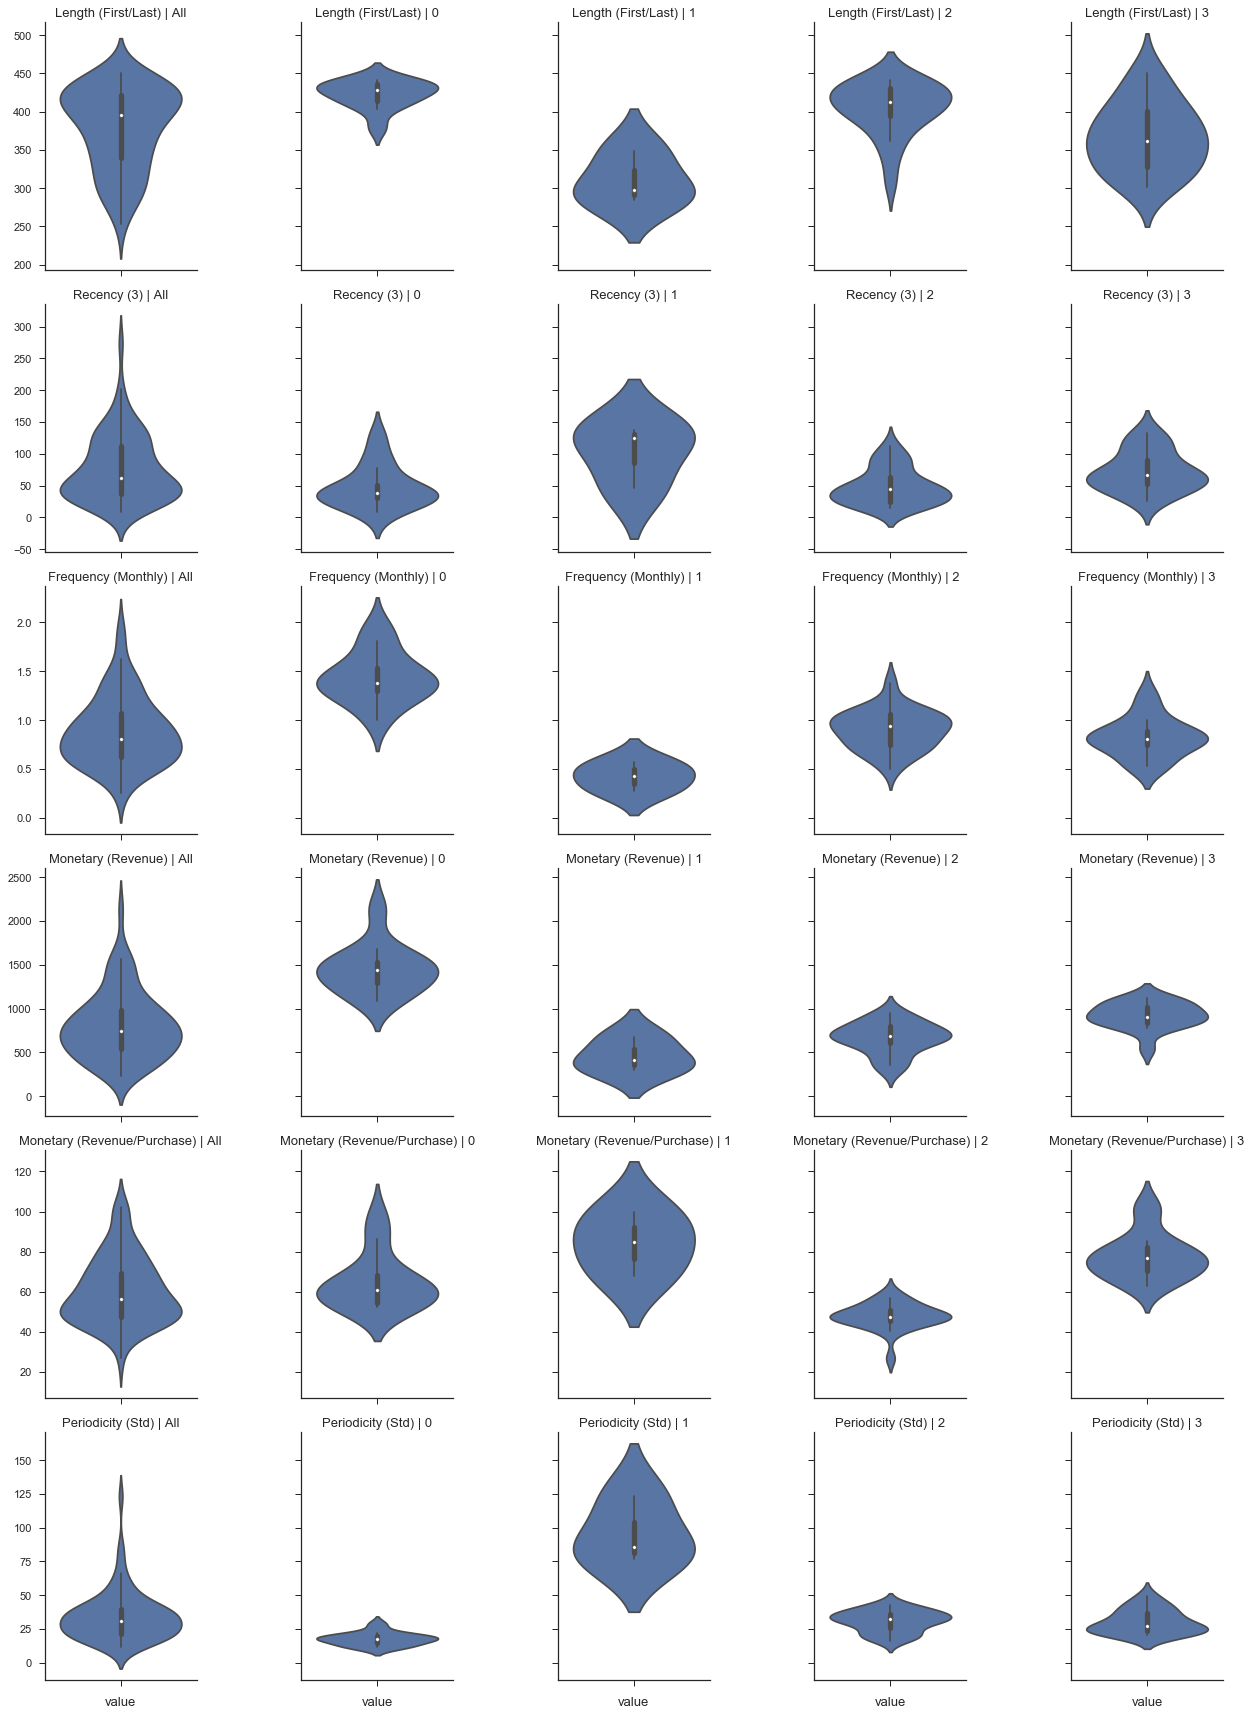

In [10]:
plot_violin(df_longform,"Violin", "visualizations/vio_cluster analysis")

## 7.4 Boxplot

http://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

In [11]:
def show_box(feature, title, output_path=None):
    g = sns.factorplot(x="Cluster", y=feature, data=df_enriched, kind="box",
                       size=4, aspect=2, order=["All",0,1,2,3], fliersize=0, palette="Blues")
    
    fig = plt.gcf()
    plt.title(title+"\n", fontsize=20, x=0.45)
    plt.ylabel(feature)
    
    def set_style():
        rc = {"axes.labelsize": 13, "xtick.labelsize": 11, "ytick.labelsize": 11}
        sns.set(font="Arial",rc=rc)
        sns.set_style("ticks")
        
    set_style()
    
    if output_path is not None:
        plt.draw()
        fig.savefig(output_path, dpi=350,
                    bbox_inches="tight", frameon=True)

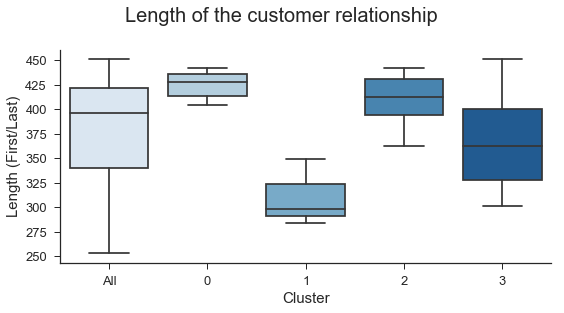

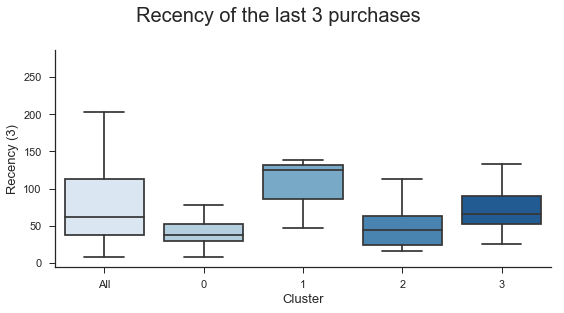

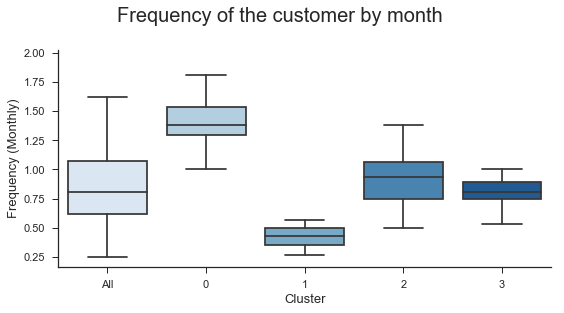

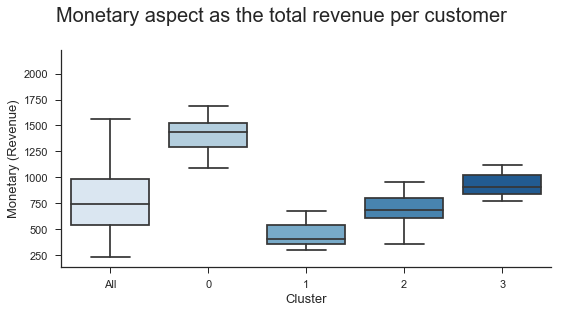

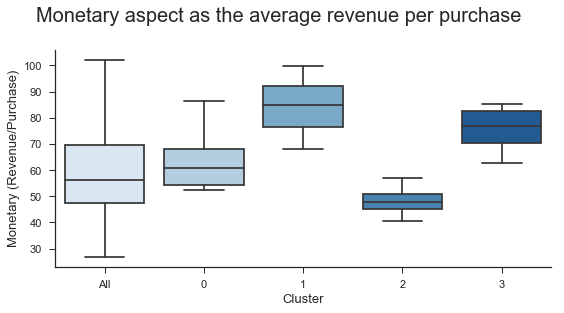

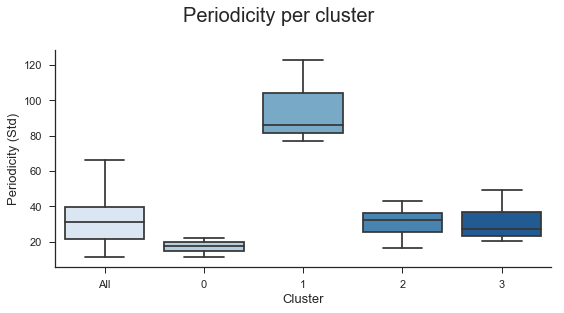

In [12]:
show_box("Length (First/Last)", "Length of the customer relationship","visualizations/box_length")
show_box("Recency (3)", "Recency of the last 3 purchases","visualizations/box_recency")
show_box("Frequency (Monthly)", "Frequency of the customer by month","visualizations/box_frequency")
show_box("Monetary (Revenue)", "Monetary aspect as the total revenue per customer","visualizations/box_monetary (revenue)")
show_box("Monetary (Revenue/Purchase)", "Monetary aspect as the average revenue per purchase","visualizations/box_monetary (revenue per purchase)")
show_box("Periodicity (Std)", "Periodicity per cluster","visualizations/box_periodicity")